# Visualizing region properties in napari
Visualizing quantitative measurements of regions in color on top of the regions is a common task when using napari. The napari plugin [napari-skimage-regionprops](https://github.com/haesleinhuepf/napari-skimage-regionprops) brings some convenience in drawing such parametric images.

See also
* [Parameteric images](data_visualization.parametric_maps)

In [1]:
from skimage.io import imread
from skimage.filters import threshold_otsu
from skimage.measure import label, regionprops_table
import napari
from napari_skimage_regionprops import visualize_measurement_on_labels, add_table

We start with loading an image and visualizing it in napari.

In [2]:
image = imread('../../data/blobs.tif')

In [3]:
# Create an empty viewer
viewer = napari.Viewer()

/Users/haase/opt/anaconda3/envs/bio_39/lib/python3.9/site-packages/napari_tools_menu/__init__.py:168: FutureWarning: Public access to Window.qt_viewer is deprecated and will be removed in
v0.5.0. It is considered an "implementation detail" of the napari
application, not part of the napari viewer model. If your use case
requires access to qt_viewer, please open an issue to discuss.
  self.tools_menu = ToolsMenu(self, self.qt_viewer.viewer)


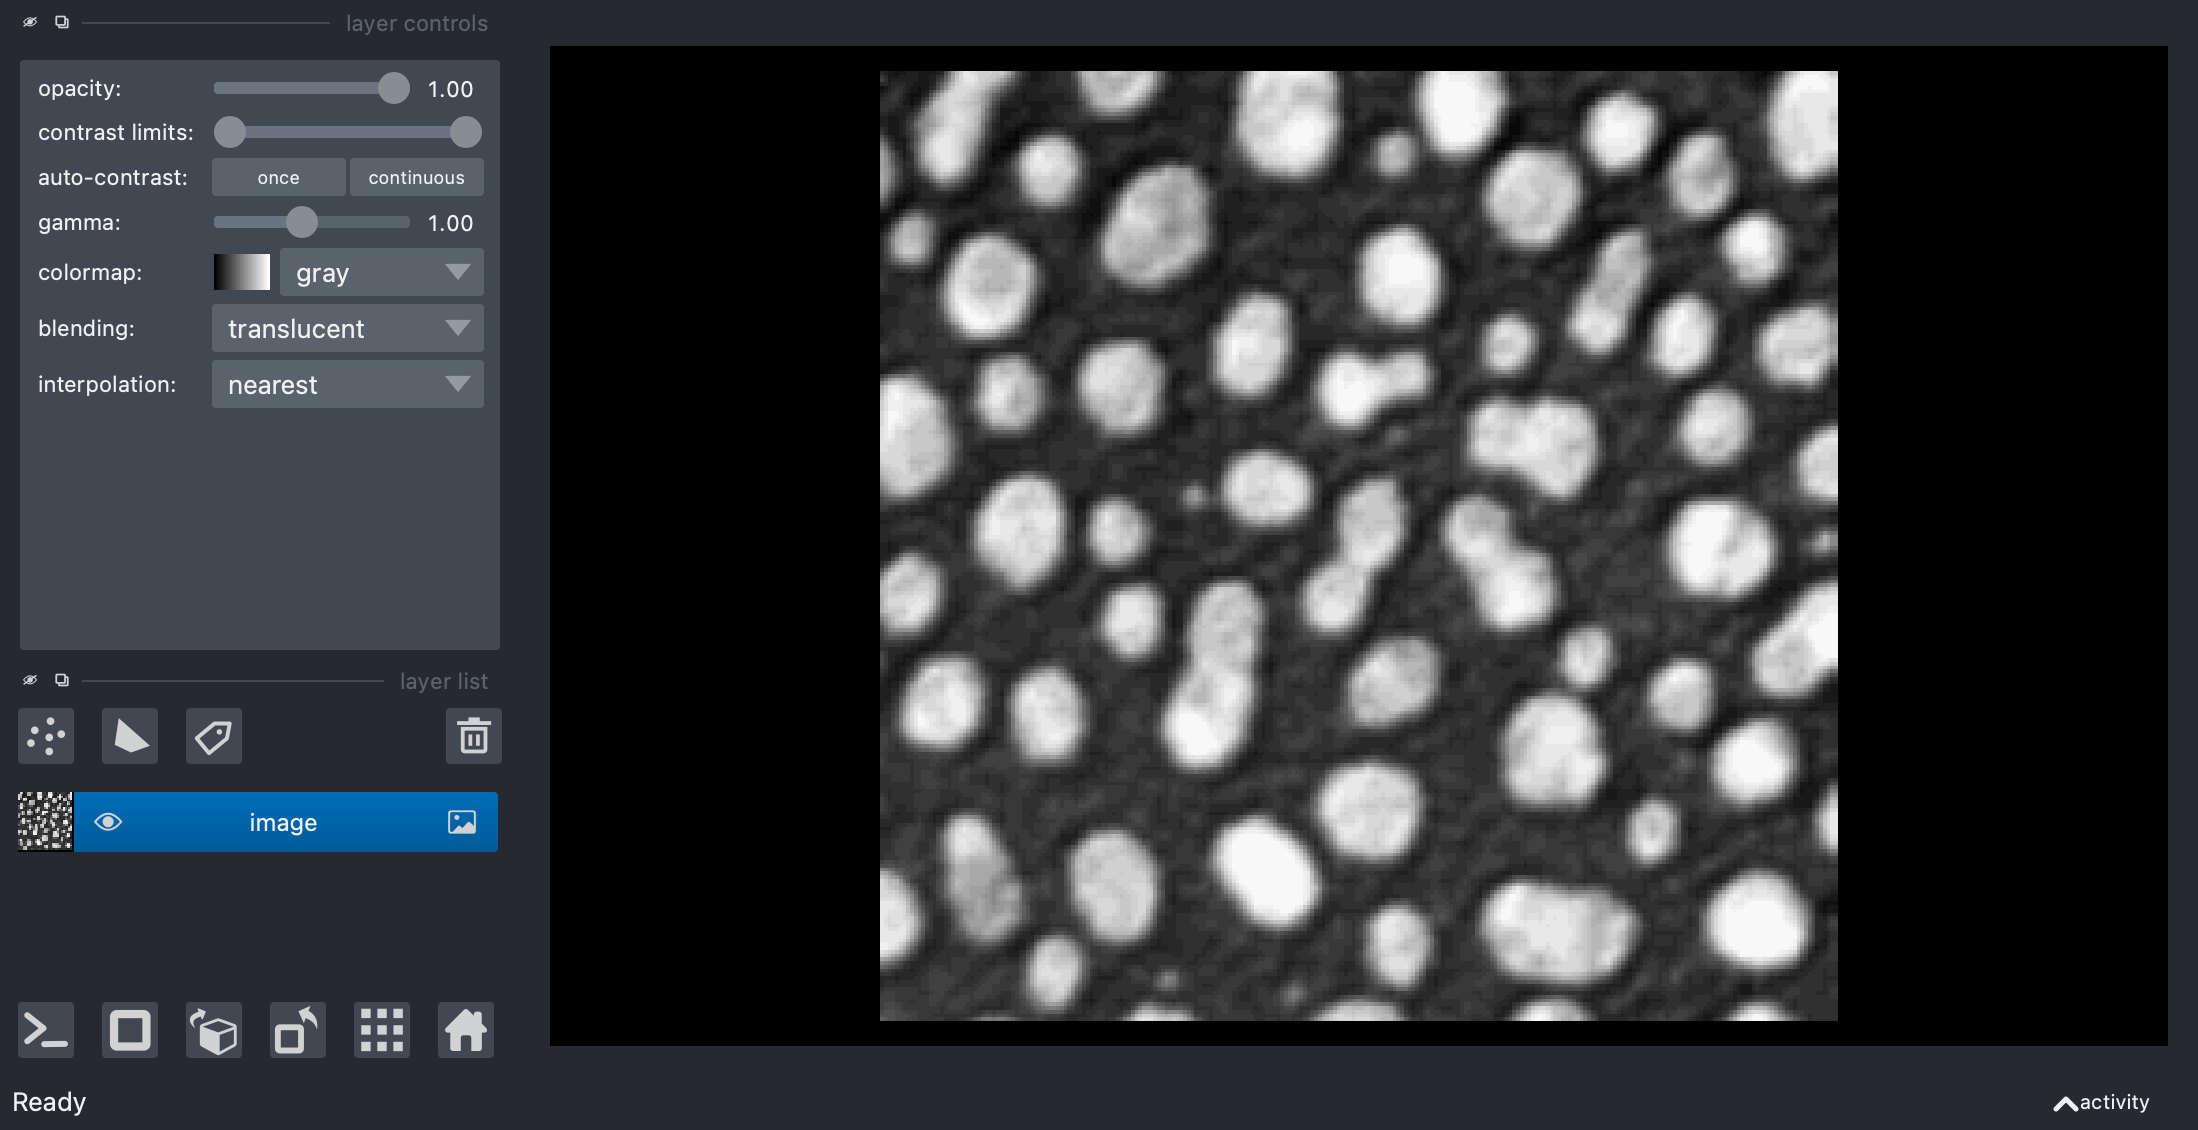

In [4]:
# Add a new layer containing an image
viewer.add_image(image)

napari.utils.nbscreenshot(viewer)

Next, we segment blobs in the image and create a label image.

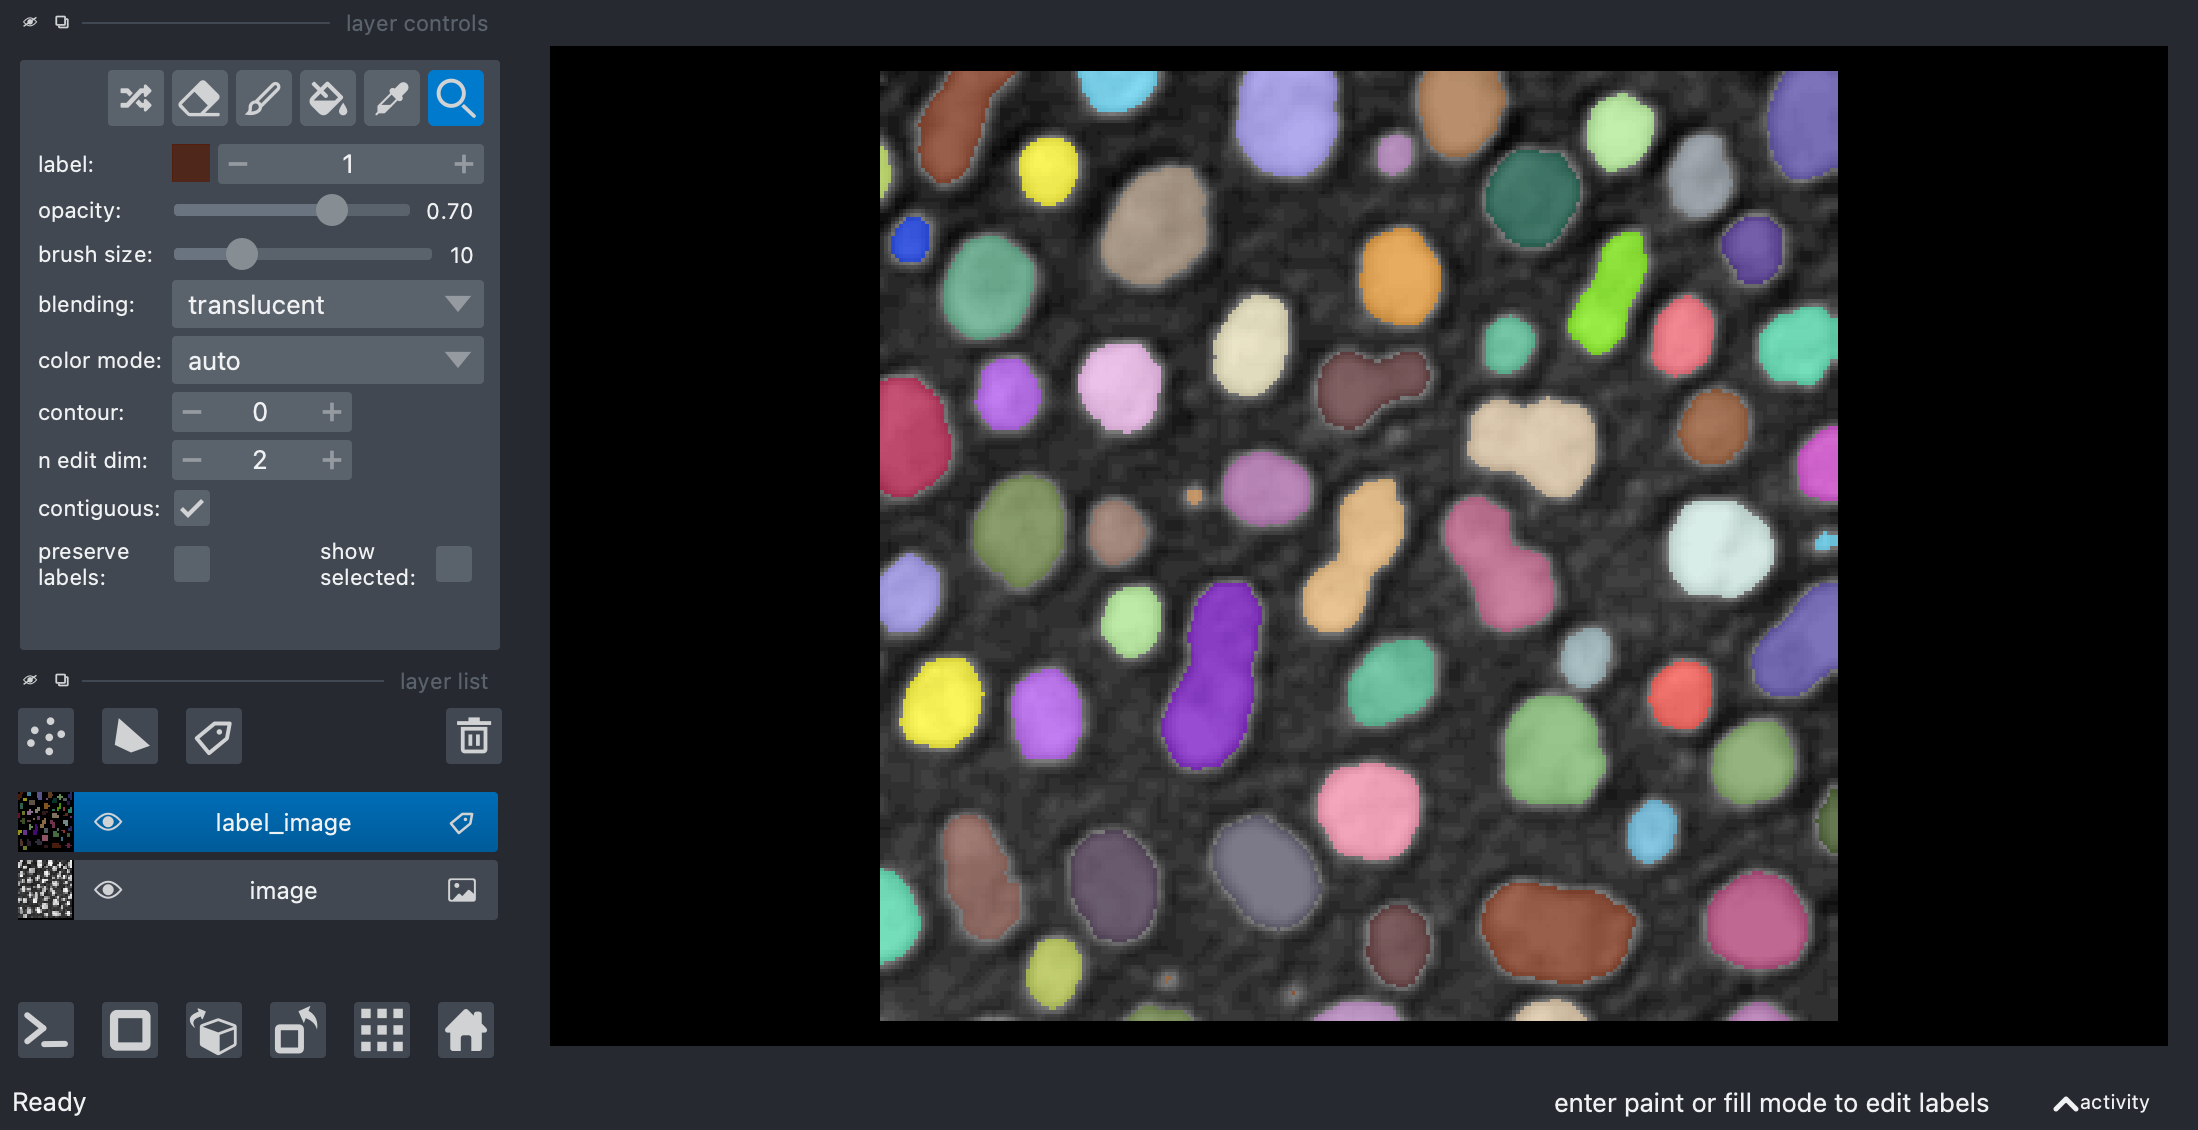

In [5]:
# segment and label blobs
threshold = threshold_otsu(image)
binary_image = image > threshold
label_image = label(binary_image)

# add labels to viewer
label_layer = viewer.add_labels(label_image)

napari.utils.nbscreenshot(viewer)

## Quantitative measurements
We now extract quantitative measurements from the label image, e.g. by measuring the `area` of the labeled objects. For that we use scikit-image's [`regionprops_table` function](https://scikit-image.org/docs/dev/api/skimage.measure.html#skimage.measure.regionprops_table). We save those statistical measurements in the label layer's `properties` so that napari and napari-plugins can post-process the data.

In [6]:
# measure region properties
statistics = regionprops_table(label_image, properties=['area'])

# save properties in the labels layer for later reuse
label_layer.properties = statistics

We then use the scriptable napari plugin [napari-skimage-regionprops](https://github.com/haesleinhuepf/napari-skimage-regionprops) to visualize the measurements in a `parametric_image` and add that image to the napari viewer as well.

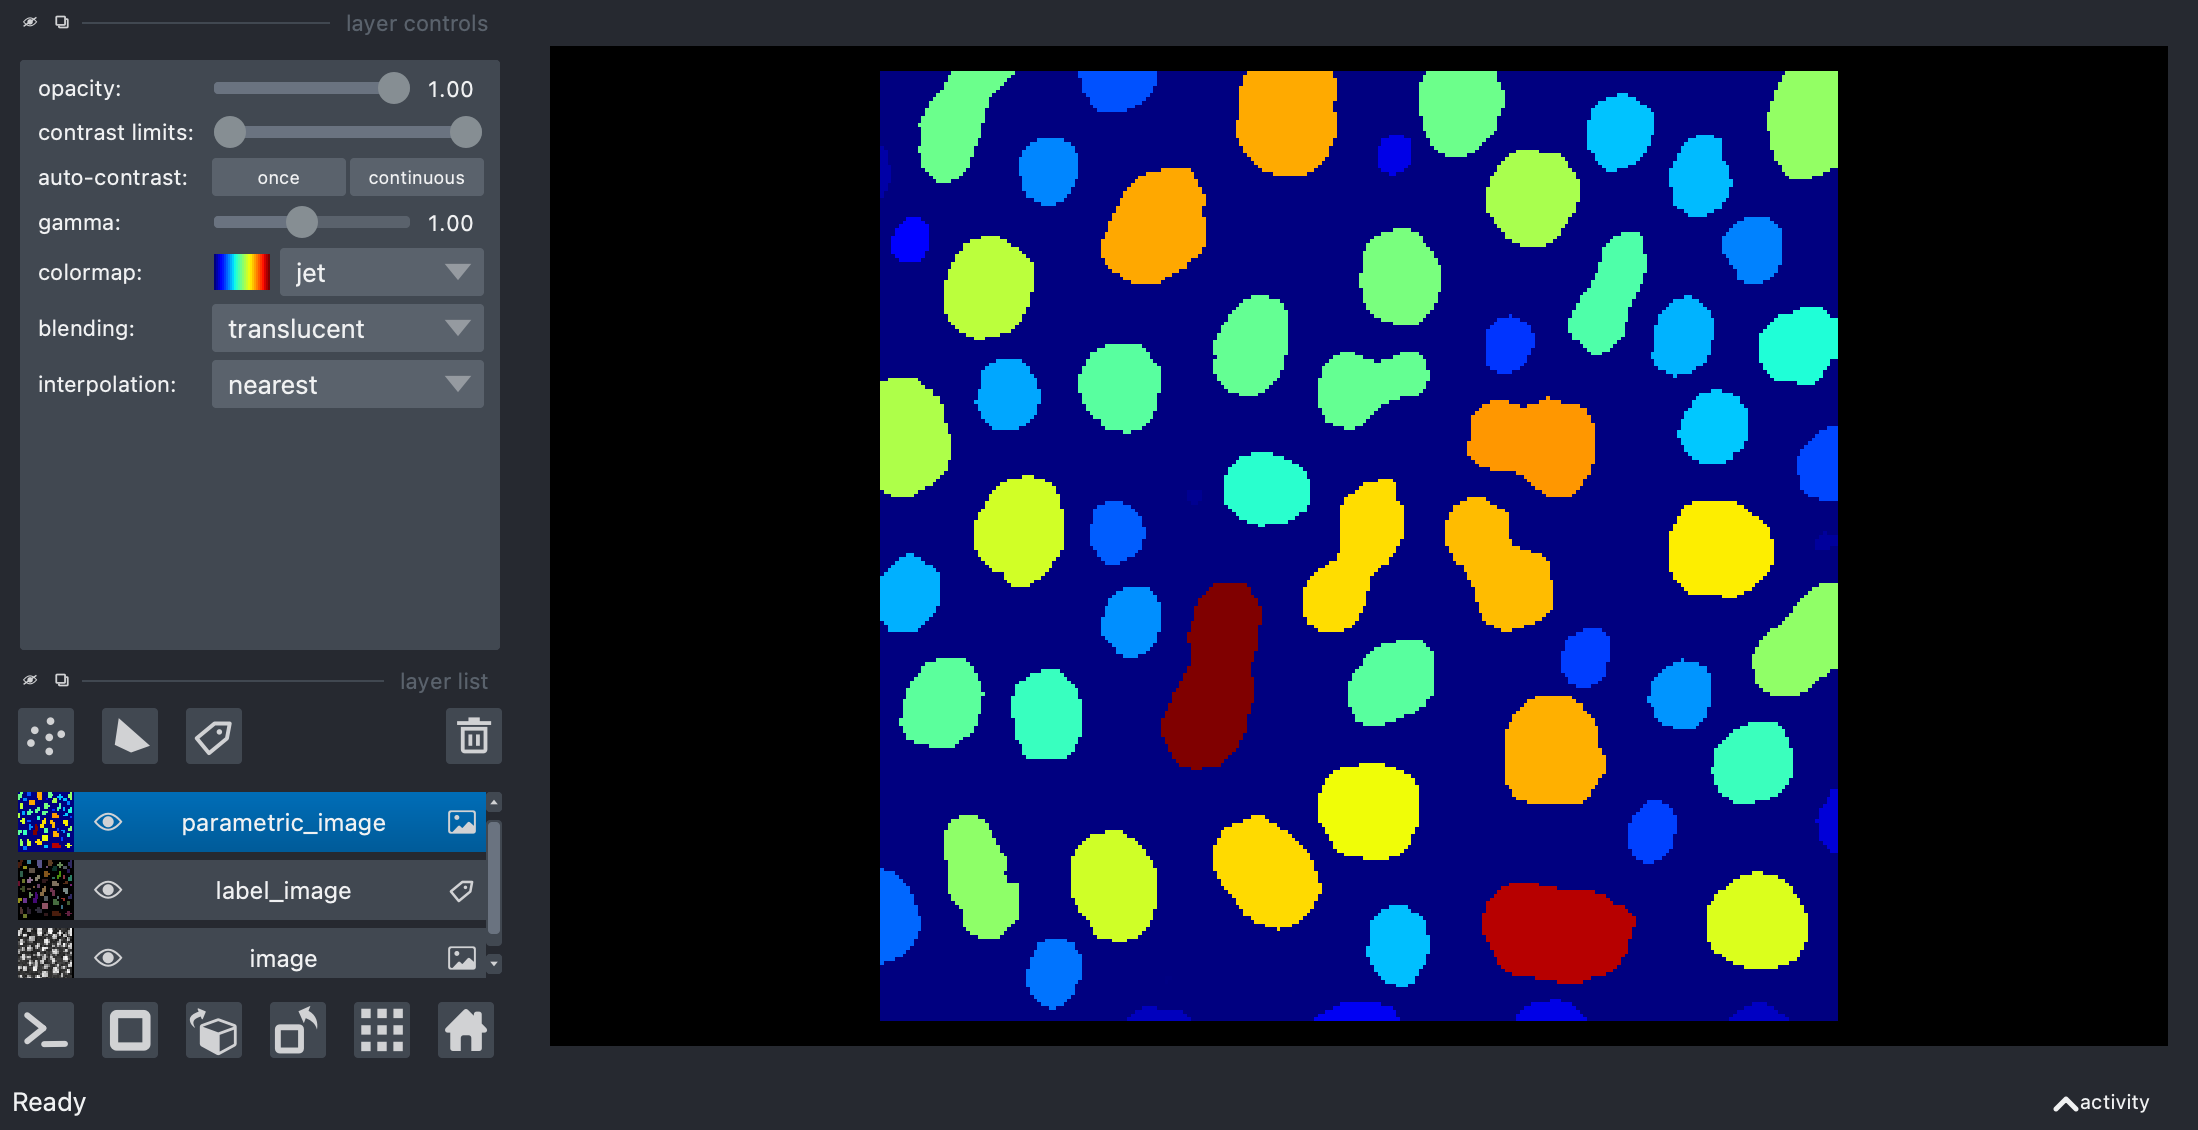

In [7]:
parametric_image = visualize_measurement_on_labels(label_layer, 'area')

viewer.add_image(parametric_image, colormap='jet')

napari.utils.nbscreenshot(viewer)

We can also visualize the measurements as table using the `add_table` function of the same napari plugin.

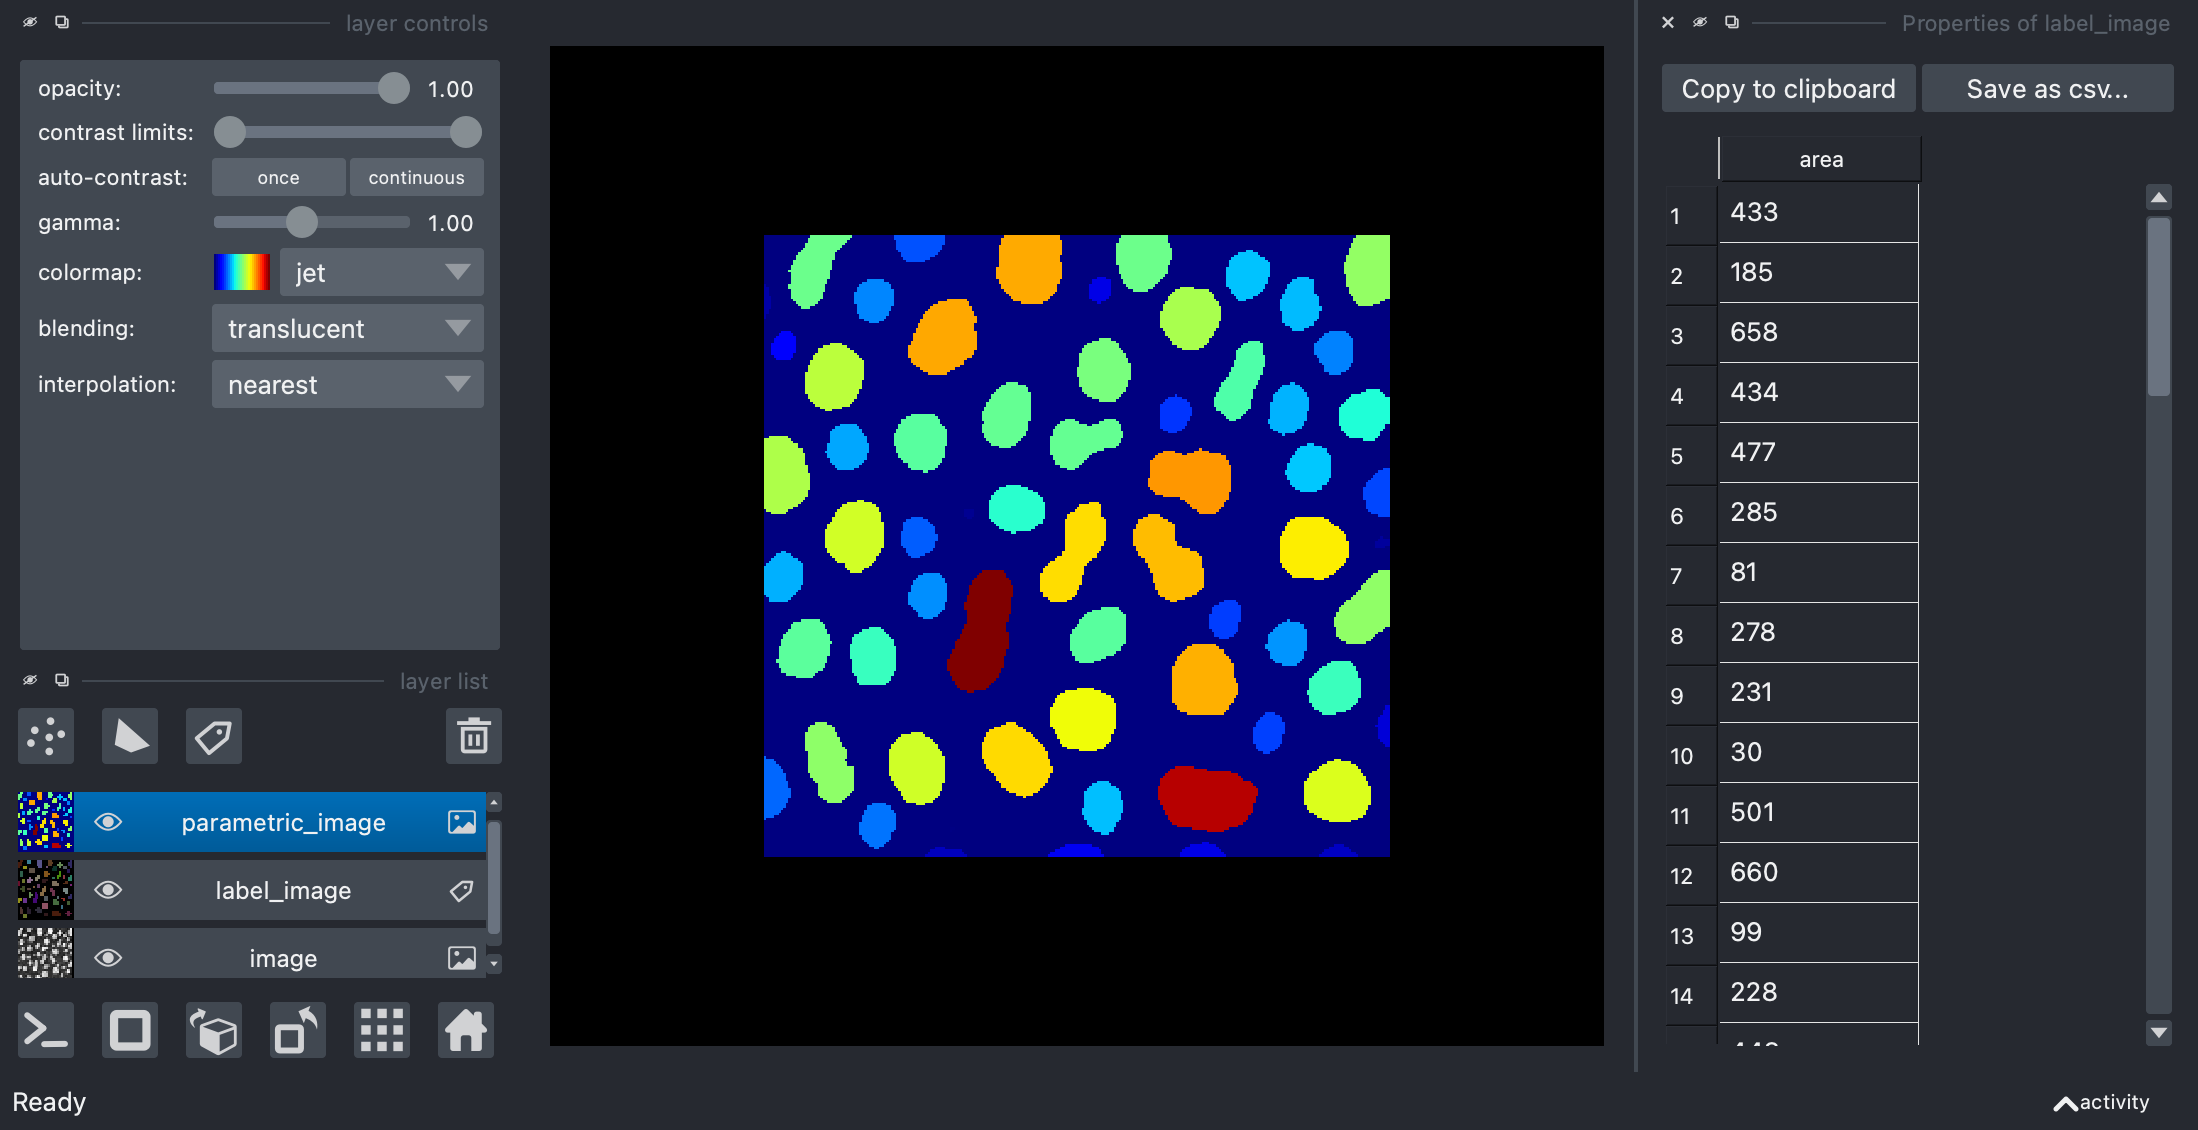

In [8]:
add_table(label_layer, viewer)

napari.utils.nbscreenshot(viewer)

## Exercise

Measure the aspect ratio of the objects and visualize the values in color.